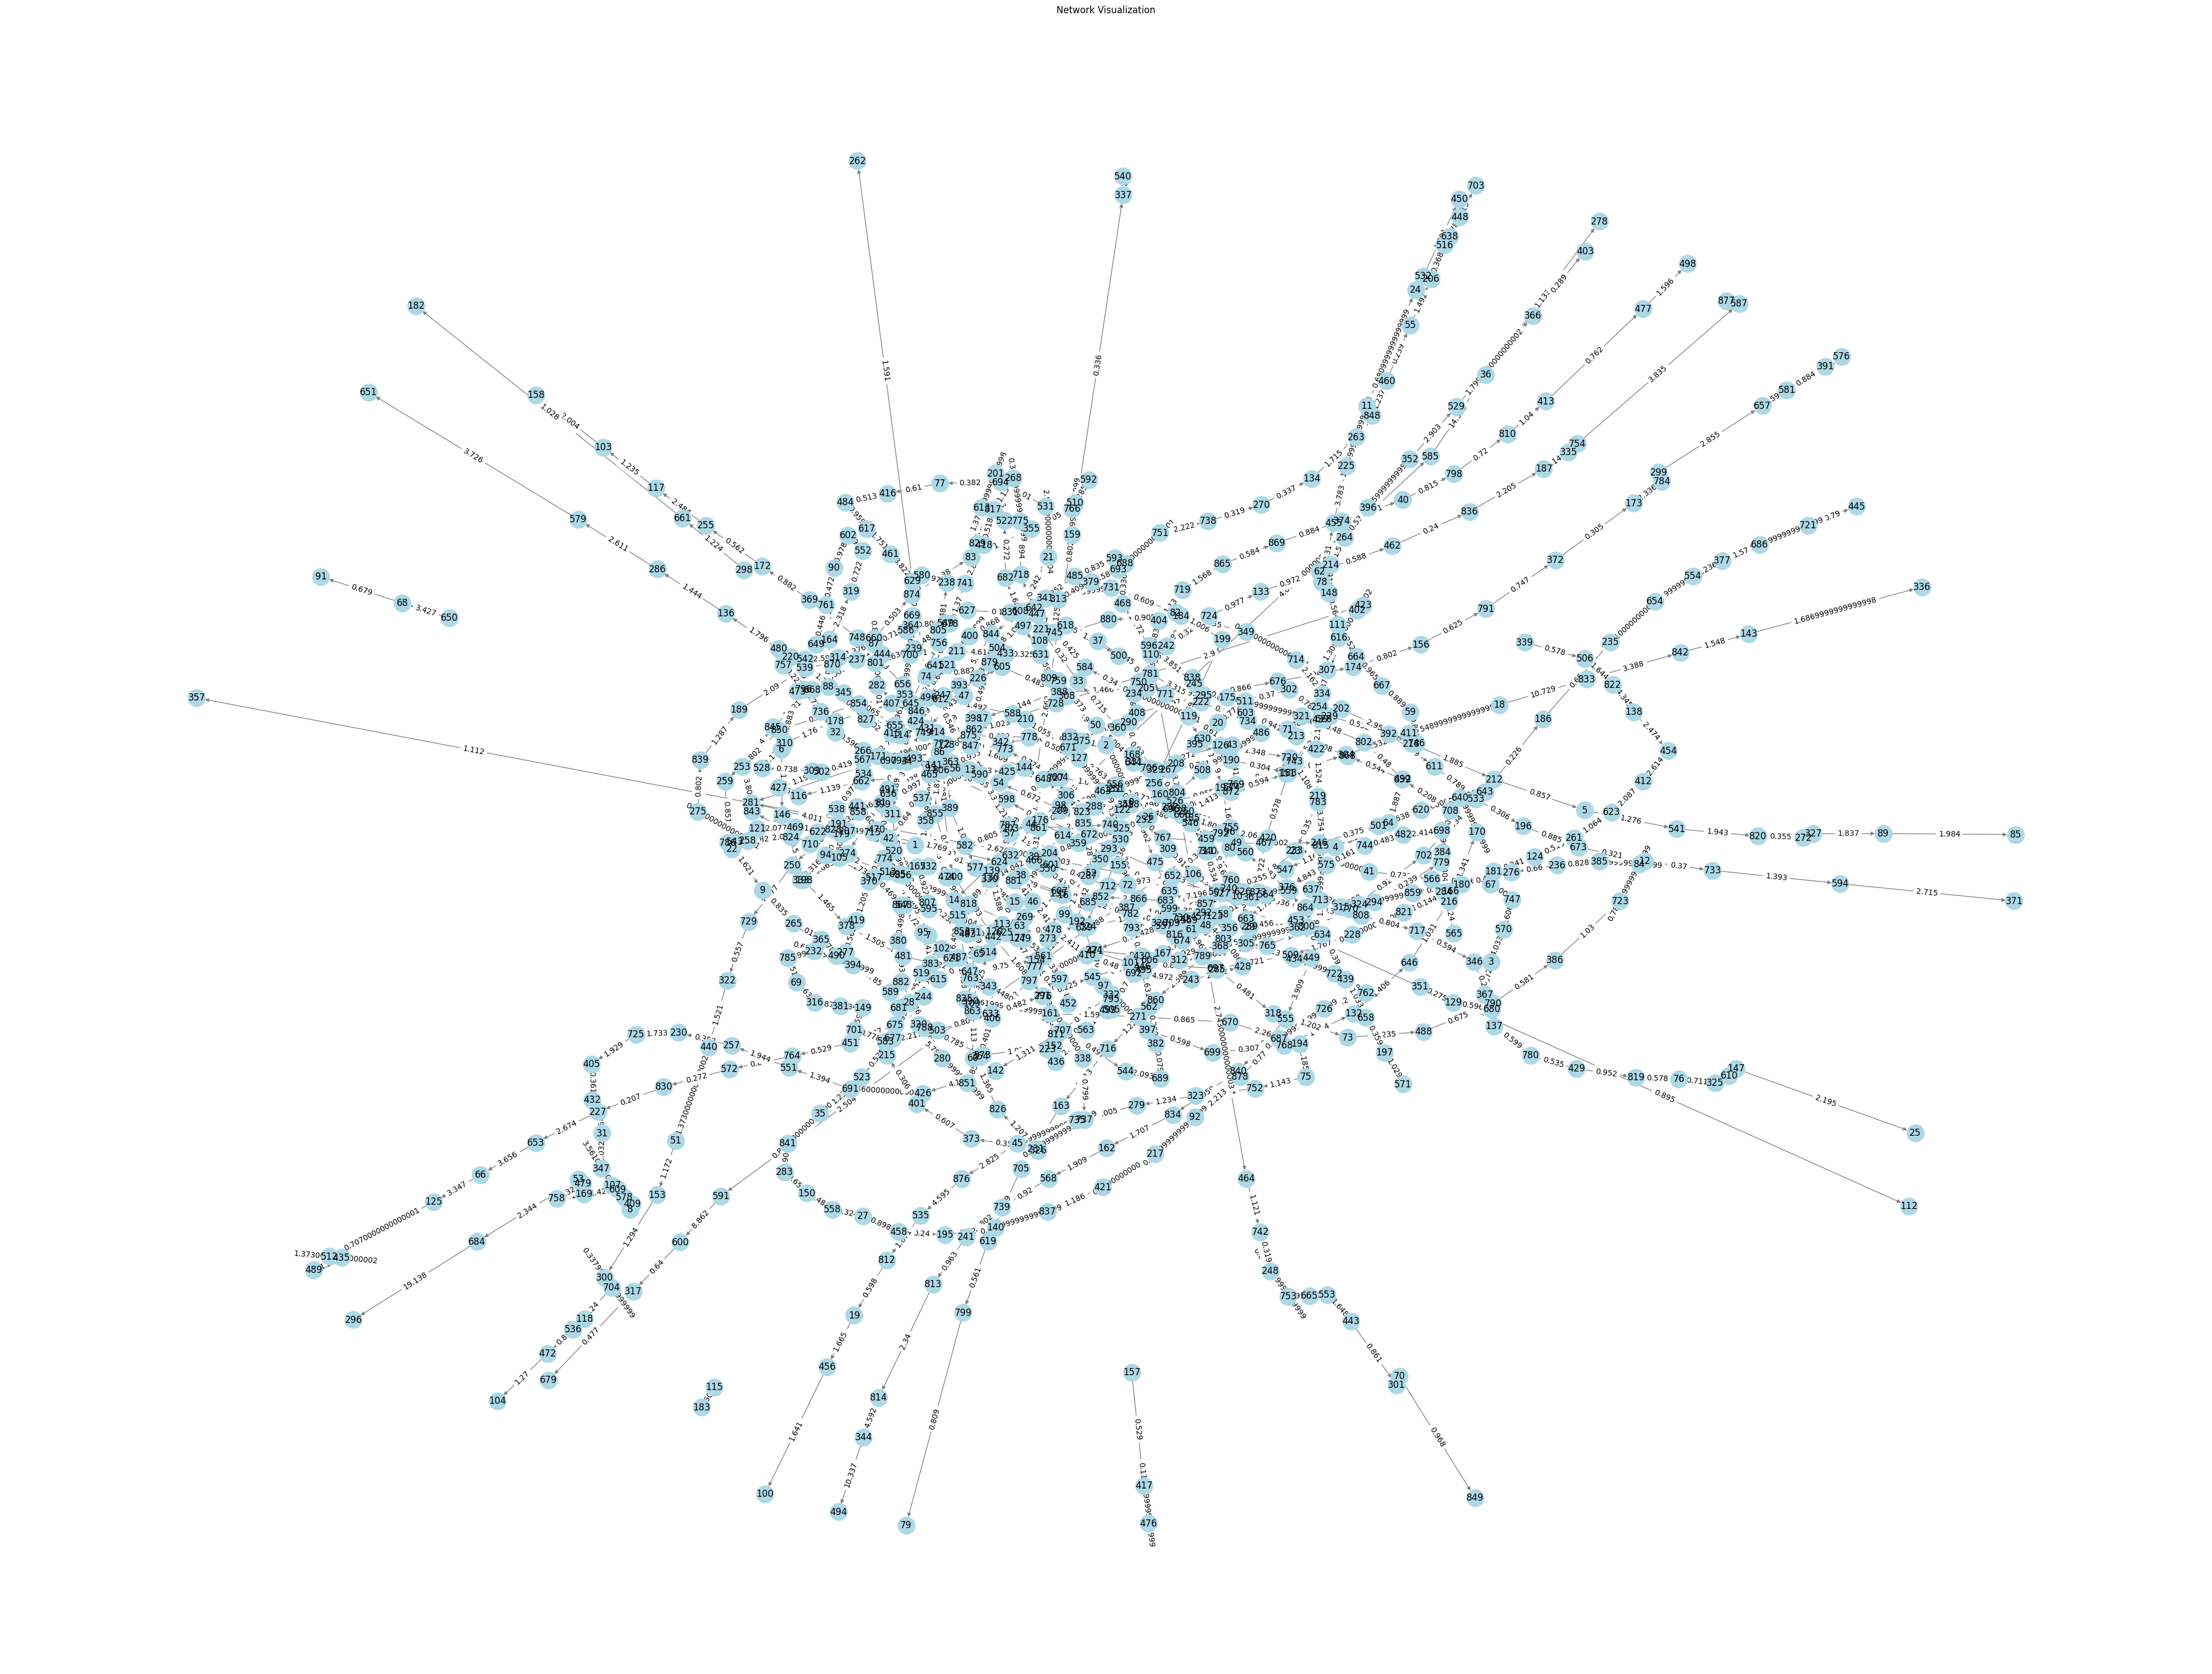

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('./data/PEMS07/PEMS07.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

pos = nx.spring_layout(G)

plt.figure(figsize=(40, 30))

nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Visualization')
plt.savefig('img')
plt.show()



In [5]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv('./data/PEMS07/PEMS07.csv')

G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

partition = community_louvain.best_partition(G.to_undirected())

for u, v, d in G.edges(data=True):
    d['community'] = partition[u]

# Detect anomalies in each community
anomalies = []
for community in set(partition.values()):
    # Get edges in the community
    edges = [(u, v, d['cost']) for u, v, d in G.edges(data=True) if d['community'] == community]
    costs = [cost for _, _, cost in edges]
    
    # Reshape for sklearn
    costs_reshaped = [[cost] for cost in costs]
    
    # Apply Isolation Forest
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(costs_reshaped)
    preds = clf.predict(costs_reshaped)
    
    # Collect anomalies
    for (u, v, cost), pred in zip(edges, preds):
        if pred == -1:
            anomalies.append((u, v, cost))

# Print detected anomalies
print("Anomalies detected (from, to, cost):")
for anomaly in anomalies:
    print(anomaly)

# Visualize the graph with anomalies highlighted
pos = nx.spring_layout(G)
plt.figure(figsize=(40, 30))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Highlight anomalies in red
anomaly_edges = [(u, v) for u, v, cost in anomalies]
nx.draw_networkx_edges(G, pos, edgelist=anomaly_edges, edge_color='r', width=2)

plt.title('Network Visualization with Anomalies Highlighted')
plt.show()


Anomalies detected (from, to, cost):
(536, 118, 1.93)
(346, 680, 0.268)
(281, 864, 2.6260000000000003)
(177, 99, 0.08)
(38, 46, 5.834)
(159, 38, 2.662)
(715, 281, 4.011)
(542, 480, 2.575)
(570, 3, 4.033)
(314, 542, 2.59)
(757, 796, 0.223)
(814, 344, 4.592)
(344, 494, 10.337)
(728, 281, 5.496)
(139, 1, 4.561)
(653, 66, 3.656)
(66, 125, 3.347)
(227, 653, 2.674)
(621, 515, 6.499)
(767, 49, 9.985)
(458, 195, 0.24)
(28, 677, 2.093)
(92, 878, 2.213)
(97, 397, 3.4210000000000003)
(768, 132, 1.874)
(256, 199, 4.669)
(247, 114, 2.929)
(247, 605, 2.435)
(84, 385, 0.3429999999999999)
(18, 833, 10.729)
(833, 842, 3.388)
(525, 438, 8.827)
(330, 39, 14.042)
(479, 53, 4.415)
(684, 296, 19.138)
(142, 426, 4.148)
(734, 71, 4.009)
(781, 222, 3.315)
(253, 845, 3.924)
(391, 576, 4.126)
(299, 657, 2.855)
(240, 683, 7.196)
(822, 138, 4.345)
(843, 253, 3.809)
(851, 280, 5.792999999999999)
(60, 109, 4.113)
(109, 514, 3.625)
(583, 503, 2.217)
(245, 596, 3.851)
(596, 468, 2.272)
(638, 703, 5.313)
(457, 110, 3.7